In [8]:
# Install imageio for creating animations.
!pip -q install imageio
!pip -q install scikit-image
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-hirhprx0
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-hirhprx0
  fatal: 无法访问 'https://github.com/tensorflow/docs/'：Failed to connect to github.com port 443 after 135208 ms: 连接超时
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-hirhprx0 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-hirhprx0 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.

In [3]:
progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']progan = hub.load("https://tfhub.dev/google/progan-128/1").signatures['default']

In [5]:
def interpolate_between_vectors():
  v1 = tf.random.normal([latent_dim])
  v2 = tf.random.normal([latent_dim])

  # Creates a tensor with 25 steps of interpolation between v1 and v2.
  vectors = interpolate_hypersphere(v1, v2, 50)

  # Uses module to generate images from the latent space.
  interpolated_images = progan(vectors)['default']

  return interpolated_images

interpolated_images = interpolate_between_vectors()
animate(interpolated_images)

usage: ipykernel_launcher.py [-h] [--n_epochs N_EPOCHS]
                             [--batch_size BATCH_SIZE] [--lr LR] [--b1 B1]
                             [--b2 B2] [--n_cpu N_CPU]
                             [--latent_dim LATENT_DIM] [--img_size IMG_SIZE]
                             [--channels CHANNELS]
                             [--sample_interval SAMPLE_INTERVAL]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/ubuntu/.local/share/jupyter/runtime/kernel-v2-265708sPVaxB28UPsd.json


SystemExit: 2

In [7]:
image_from_module_space = True  # @param { isTemplate:true, type:"boolean" }

def get_module_space_image():
  vector = tf.random.normal([1, latent_dim])
  images = progan(vector)['default'][0]
  return images

def upload_image():
  uploaded = files.upload()
  image = imageio.imread(uploaded[list(uploaded.keys())[0]])
  return transform.resize(image, [128, 128])

if image_from_module_space:
  target_image = get_module_space_image()
else:
  target_image = upload_image()

display_image(target_image)

NameError: name 'opt' is not defined

In [30]:
tf.random.set_seed(42)
initial_vector = tf.random.normal([1, latent_dim])

In [31]:
# 创建生成器
netG = Generator(ngpu).to(device)
 
# 如果需要，初始化权重
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))
 
# 初始化所有权重
netG.apply(weights_init)
 
# 打印生成器信息
print(netG)

DataParallel(
  (module): Generator(
    (main): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
      (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): ReLU(inplace=True)
      (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2

/home/ubuntu/anaconda3/envs/yolo/lib/python3.10/site-packages/torch/nn/parallel/data_parallel.py:33: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


In [32]:
# 判别器代码
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # 输入是 (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # 状态尺寸. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # 状态尺寸. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # 状态尺寸. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # 状态尺寸. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
 
    def forward(self, input):
        return self.main(input)

In [33]:
# 创建判别器
netD = Discriminator(ngpu).to(device)
 
# 如果需要，初始化权重
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))
 
# 初始化所有权重
netD.apply(weights_init)
 
# 打印判别器信息
print(netD)

DataParallel(
  (module): Discriminator(
    (main): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.2, inplace=True)
      (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): LeakyReLU(negative_slope=0.2, inplace=True)
      (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (7): LeakyReLU(negative_slope=0.2, inplace=True)
      (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): LeakyReLU(negative_slope=0.2, inplace=True)
      (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    

In [34]:
# 初始化二进制交叉熵损失函数
criterion = nn.BCELoss()
 
# 创建一个批次的潜在向量，这些向量将用于可视化生成器的进度
fixed_noise = torch.randn(64, nz, 1, 1, device=device)
 
# 真实标签是1，假标签是0
real_label = 1.
fake_label = 0.
 
# 为G和D设置Adam优化器
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [35]:
# 训练循环
 
# 保持生成器和判别器的损失的进度
img_list = []
G_losses = []
D_losses = []
iters = 0
 
print("Starting Training Loop...")

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):
 
        ############################
        # (1) 更新D网络: 最大化 log(D(x)) + log(1 - D(G(z)))
        ###########################
        netD.zero_grad()
        
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()
 
        ## 用全假图像训练D
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)

        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()
 
        ############################
        # (2) 更新G网络: 最大化 log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  

        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
 
        if i % 50 == 0:
            print('[%d/%d][%3.d/%3.d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
 
        # 保存损失以供以后绘图
        G_losses.append(errG.item())
        D_losses.append(errD.item())
 
        # 检查生成器的输出
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()

            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
 
        iters += 1

Starting Training Loop...
[0/1][  0/1095]	Loss_D: 1.3464	Loss_G: 4.5294	D(x): 0.4783	D(G(z)): 0.3512 / 0.0142
[0/1][ 50/1095]	Loss_D: 0.1503	Loss_G: 5.3318	D(x): 0.8889	D(G(z)): 0.0090 / 0.0079
[0/1][100/1095]	Loss_D: 0.4474	Loss_G: 5.0253	D(x): 0.8137	D(G(z)): 0.1746 / 0.0105
[0/1][150/1095]	Loss_D: 0.2230	Loss_G: 5.0589	D(x): 0.9420	D(G(z)): 0.1331 / 0.0125
[0/1][200/1095]	Loss_D: 0.2907	Loss_G: 3.6113	D(x): 0.8769	D(G(z)): 0.1304 / 0.0429
[0/1][250/1095]	Loss_D: 0.2243	Loss_G: 5.0237	D(x): 0.9102	D(G(z)): 0.1028 / 0.0127
[0/1][300/1095]	Loss_D: 0.5274	Loss_G: 6.2898	D(x): 0.9770	D(G(z)): 0.3356 / 0.0047
[0/1][350/1095]	Loss_D: 0.9814	Loss_G: 9.6439	D(x): 0.9635	D(G(z)): 0.4805 / 0.0006
[0/1][400/1095]	Loss_D: 0.3020	Loss_G: 3.1710	D(x): 0.8056	D(G(z)): 0.0376 / 0.0762
[0/1][450/1095]	Loss_D: 0.2147	Loss_G: 4.8807	D(x): 0.8666	D(G(z)): 0.0316 / 0.0200
[0/1][500/1095]	Loss_D: 0.2641	Loss_G: 4.3893	D(x): 0.9114	D(G(z)): 0.1365 / 0.0210
[0/1][550/1095]	Loss_D: 0.2152	Loss_G: 3.7714	D(x)

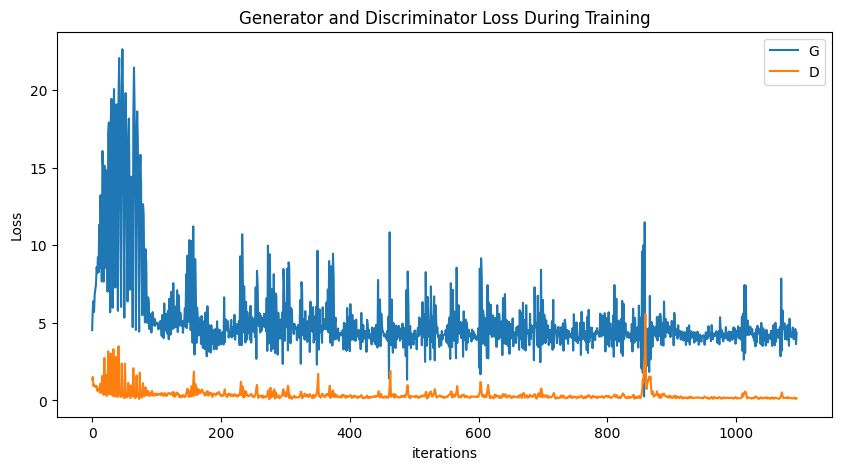

In [36]:
# 打印生成器和判别器的损失
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

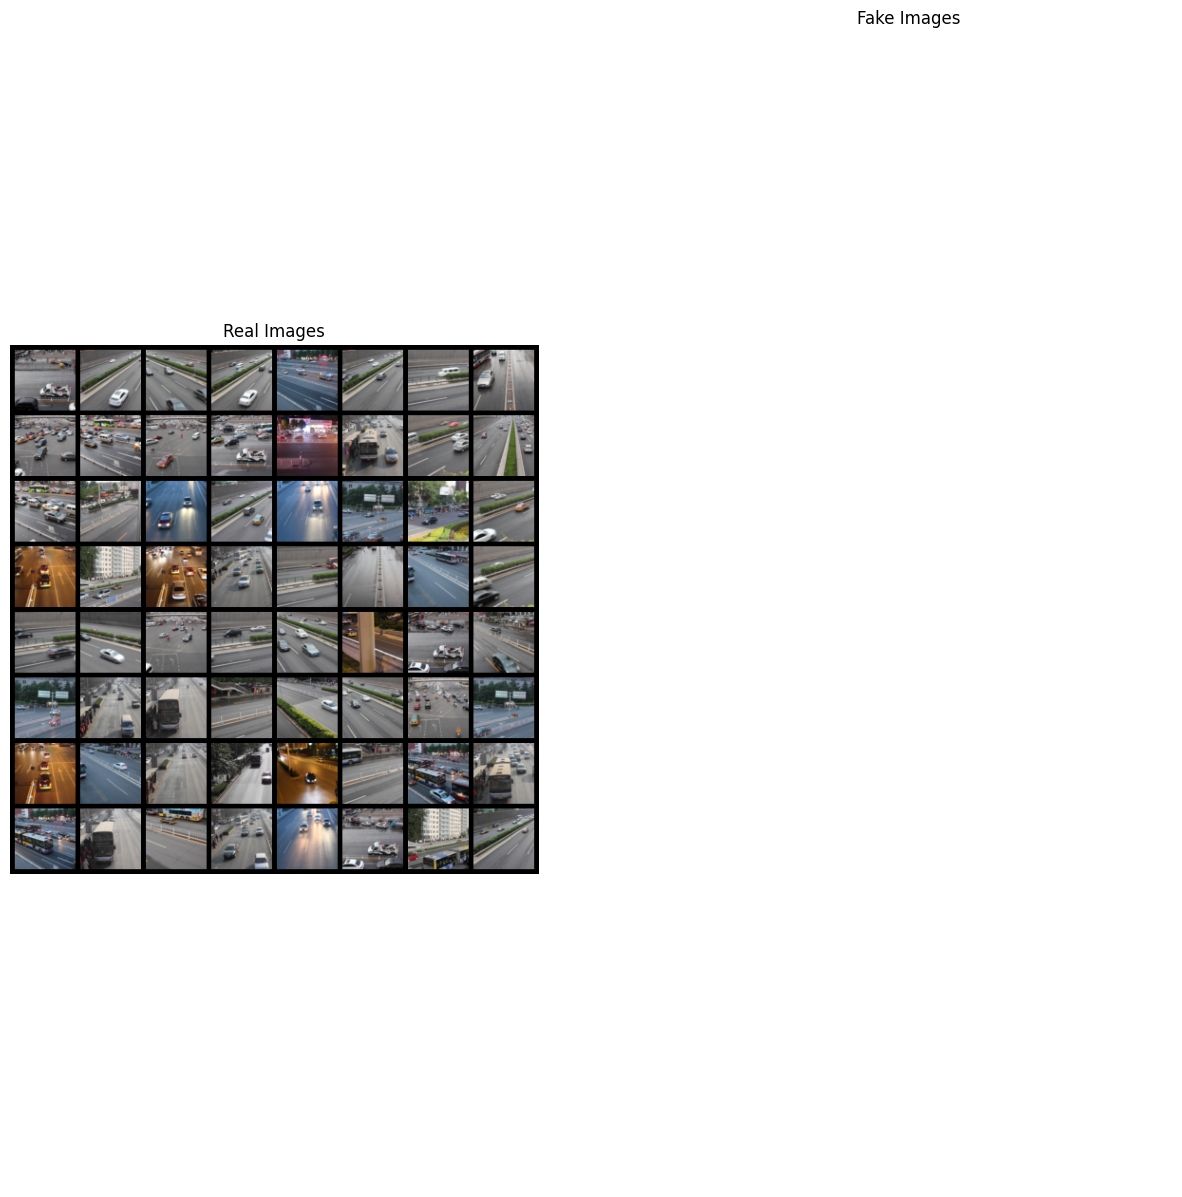

In [40]:
real_batch = next(iter(dataloader))
 
# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))
 
# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()

In [ ]:
# 查看图片数量
print(len(img_list[-1]))

4


In [ ]:
images = img_list[-1]

for i in range(len(images)):
    vutils.save_image(images[i], './fake_images/fake_image'+str(i)+'.png')